In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

data = pd.read_csv('datasets/migraine_data.csv')
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [ ]:
data.isna().sum()

,0
Age,0
Duration,0
Frequency,0
Location,0
Character,0
Intensity,0
Nausea,0
Vomit,0
Phonophobia,0
Photophobia,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [ ]:
columns = data.columns
print(columns)

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')


In [ ]:
data.shape

(400, 24)

In [ ]:
data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
X = data.drop(columns = ['Type'])
y = data['Type']
X.shape,y.shape

((400, 23), (400,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DT.predict(X_test) 

In [ ]:
print(y_pred) 

['Typical aura with migraine' 'Typical aura with migraine'
 'Migraine without aura' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Basilar-type aura' 'Typical aura with migraine'
 'Sporadic hemiplegic migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura without migraine'
 'Migraine without aura' 'Typical aura with migraine'
 'Typical aura with migraine' 'Migraine without aura'
 'Typical aura with migraine' 'Migraine without aura'
 'Typical aura with migraine' 'Familial hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Basilar-type aura' 'Typical aura with migraine'
 'Typical aura with migraine' 'Basilar-type aura'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Basilar-type aura' 'Typical aura with migraine'
 'Typical aura with migraine' 'Migraine without aura'
 'Typical aura with migraine' 'Typical aura with mi

In [ ]:
DT.score(X_test,y_test)

0.85

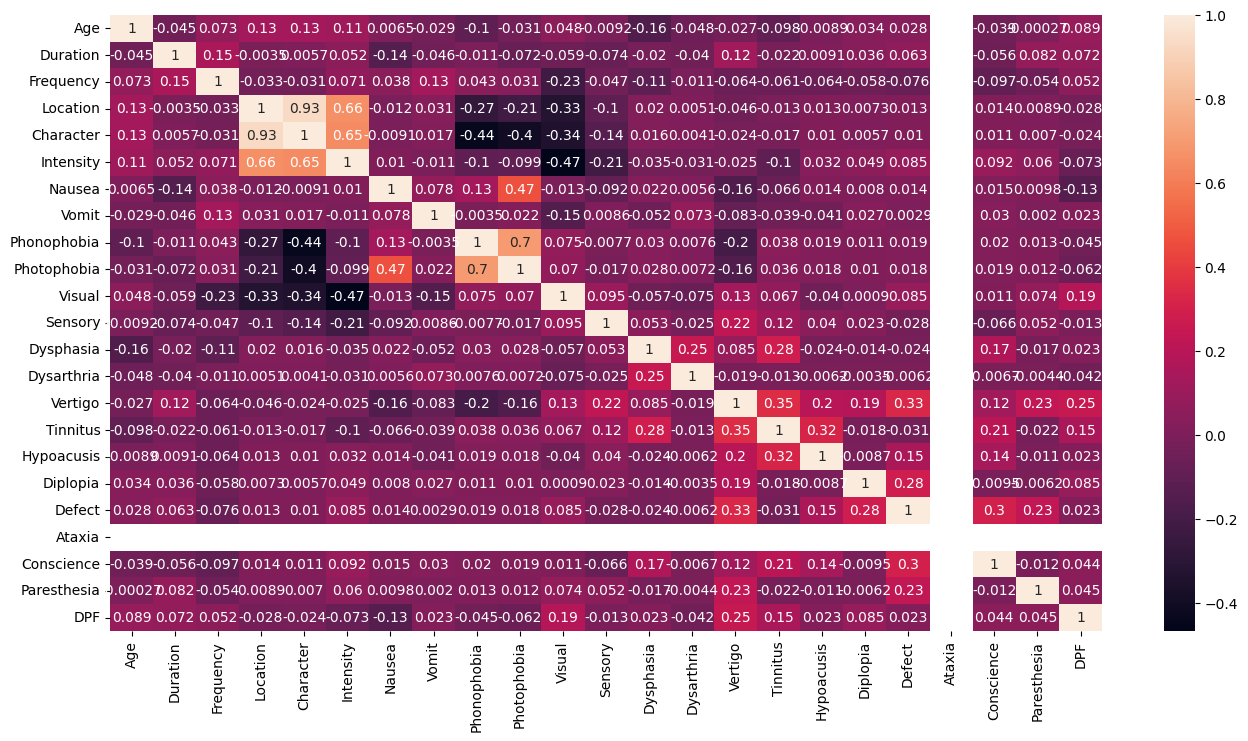

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)

Accuracy of decision tree: 0.85
Confusion matrix of decision tree:
 [[ 4  1  0  0  0  1  0]
 [ 1  0  1  0  1  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  1  2  0  0  1  0]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  1 48  0]
 [ 0  0  0  0  0  0  3]]
Recall of decision tree: [0.66666667 0.         1.         0.         0.         0.97959184
 1.        ]


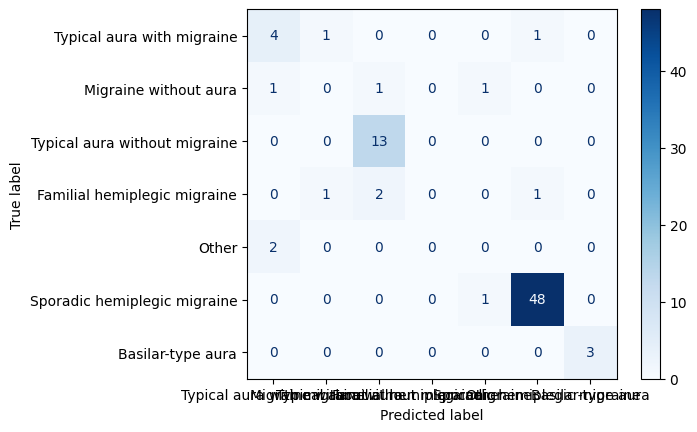

In [ ]:

accuracy_tree = accuracy_score(y_test, y_pred)
cm_tree = confusion_matrix(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred, average=None)

print("Accuracy of decision tree:", accuracy_tree)
print("Confusion matrix of decision tree:\n", cm_tree)
print("Recall of decision tree:", recall_tree)
unique_labels = y_train.unique() # or y_test.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=unique_labels)
disp.plot(cmap='Blues')

In [ ]:
# Plot decision tree
from sklearn.tree import plot_tree # Import the plot_tree function

class_names = [str(i) for i in sorted(data['Type'].unique())]
plt.figure(figsize=(96, 96))
plot_tree(DT, feature_names=X.columns, class_names=class_names, filled=True)